<a href="https://colab.research.google.com/github/mavito/ML_Concepts/blob/main/ML_ProbabilityDistributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability and Distributions in Machine Learning**



## **1. Construction of a Probability Space**

Just as linear algebra provides the rules for manipulating vectors, probability theory provides the rules for manipulating uncertainty. A probability space is defined by three specific components, often called the "Probability Triple" :
1. The Sample Space ($\Omega$): This is the set of all possible outcomes of an experiment. It is the "universe" of the problem. Nothing can happen outside of this set.
2. The Event Space ($\mathcal{A}$): This is the set of all outcomes we care about. Technically, this is a $\sigma$-algebra (sigma-algebra), a collection of subsets of $\Omega$. An "event" is a bucket containing one or more outcomes.
3. The Probability Measure ($P$): A function that assigns a number between 0 and 1 to every event. It must follow Kolmogorov's axioms: non-negativity, normalization ($P(\Omega)=1$), and additivity for disjoint events.

To explain the abstract definitions of $\Omega$ and $\mathcal{A}$, consider the architecture of a massive multiplayer video game.

**The Sample Space ($\Omega$) is the Game Code:**

Imagine every possible thing that can happen in the game is a single line of code or a specific state. "Player A moves left 1 pixel," "Player A jumps," "Player A opens menu." The Sample Space is the exhaustive list of every granular atomic state the game engine can produce. It is massive and messy.

**The Random Variable ($X$) is the Scoreboard:**

The scoreboard doesn't care about pixels. It looks at the complex game state (Sample Space) and extracts a single number: "Current Score."
- Outcome: "Player hits enemy with fire spell." -> Random Variable Function -> Value: +100 Points.
- Outcome: "Player hits enemy with ice spell." -> Random Variable Function -> Value: +100 Points.
- The Random Variable maps different outcomes to the same number.

**The Event Space ($\mathcal{A}$) is the Achievement System:**

The game doesn't track every single pixel movement for achievements. It tracks meaningful groupings.
- Event: "Win the Match."
- This event includes millions of different Sample Space outcomes (winning by 1 point, winning by 100 points, winning while jumping).
- We assign a probability to the Event "Win the Match," not to the specific sequence of pixels that led there.

**The Dice Universe**

You will build a probability space from scratch using Python. We will model a classic tabletop game scenario: rolling two dice. Instead of using formulas, we will generate the entire universe of outcomes and query it like a database.

The following code explicitly generates $\Omega$ and implements a Random Variable as a function.

In [3]:
import pandas as pd
import numpy as np

def create_dice_universe():
    """
    Constructs the explicit sample space for rolling two 6-sided dice.
    """
    # 1. Define the Sample Space (Omega)
    # Omega is the set of all possible tuples (die1, die2)
    # We use a list comprehension to generate the Cartesian product
    die_faces = [1,2,3,4,5,6]
    omega = [(d1, d2) for d1 in die_faces for d2 in die_faces]

    # 2. Define the Probability Measure (P)
    # For fair dice, each outcome is equally likely.
    # Total outcomes = 6 * 6 = 36
    total_outcomes = len(omega)
    probability_per_outcome = 1 / total_outcomes

    # We use a Pandas DataFrame to represent the Probability Space
    # Each row is an outcome \omega
    prob_space = pd.DataFrame(omega,columns = ["d1","d2"])
    prob_space['Probability'] = probability_per_outcome

    return prob_space

def random_variable_sum(row):
    """
    A Random Variable X that maps an outcome to the sum of the dice.
    X: Omega -> Real Numbers
    """
    return row + row

def calculate_event_probability(prob_space, condition_func):
    """
    Calculates P(E) where E is defined by the condition_func.
    This simulates the measure function P mapping an Event to .
    """
    # 1. Identify the Event Set: Filter outcomes that satisfy the condition
    event_outcomes = prob_space[prob_space.apply(condition_func, axis=1)]

    # 2. Apply the Measure: Sum the probabilities of the outcomes in the event
    # This relies on the axiom of countable additivity for disjoint outcomes
    probability = event_outcomes['Probability'].sum()

    return probability, event_outcomes

# --- Execution and Demonstration ---
df_space = create_dice_universe()

# Apply the Random Variable X (Sum) to the space
df_space = df_space.apply(random_variable_sum, axis=1)

print(f"Size of Sample Space (Omega): {len(df_space)}")
print("\nFirst 5 outcomes in Omega (The 'Universe'):")
print(df_space.head())

# Define an Event A: The sum of dice is greater than 7
# This lambda function defines the subset A \in \mathcal{A}
event_condition_A = lambda row: row > 7

prob_A, outcomes_A = calculate_event_probability(df_space, event_condition_A)

print(f"\n--- Event Analysis: Sum > 7 ---")
print(f"Number of outcomes in Event A: {len(outcomes_A)}")
print(f"Calculated Probability P(A): {prob_A:.4f}")
print(f"Theoretical Check: 15/36 = {15/36:.4f}")

# Example of Disjoint Events (Additivity Axiom)
# Event B: Sum is exactly 2 (Snake eyes)
event_condition_B = lambda row: row == 2
prob_B, outcomes_B = calculate_event_probability(df_space, event_condition_B)

print(f"\n--- Disjoint Event Analysis ---")
print(f"P(Sum > 7) = {prob_A:.4f}")
print(f"P(Sum == 2) = {prob_B:.4f}")
print(f"P(Sum > 7 OR Sum == 2) = {prob_A + prob_B:.4f}")

Size of Sample Space (Omega): 36

First 5 outcomes in Omega (The 'Universe'):
    d1    d2  Probability
0  2.0   2.0     0.055556
1  2.0   4.0     0.055556
2  2.0   6.0     0.055556
3  2.0   8.0     0.055556
4  2.0  10.0     0.055556

--- Event Analysis: Sum > 7 ---
Number of outcomes in Event A: 36
Calculated Probability P(A): 0.0000
Theoretical Check: 15/36 = 0.4167

--- Disjoint Event Analysis ---
P(Sum > 7) = 0.0000
P(Sum == 2) = 0.0000
P(Sum > 7 OR Sum == 2) = 0.0000


## Task 1.1: The RPG Loot Table

In many Role-Playing Games (RPGs), defeating a monster yields "loot." The loot system is a probability space. You will construct a probability space for a "Loot Box" and analyze random variables associated with value and rarity.

Steps:
1. Define the Sample Space: Create a Python class LootBoxSpace. The sample space consists of 10 possible items (strings): ``.
2. Define Probabilities: Assign unequal probabilities to these items. Trash should be high probability, Legendary should be very low. Ensure they sum to exactly 1.0. Create a DataFrame representing this space.
3. Define Random Variables:
  - Value: Create a function mapping items to gold value (e.g., Trash = 0, Legendary = 1000).
  - IsGear: Boolean random variable (True if it is equipment, False if Trash/Gold/Potion).
4. Event Queries: Using the calculate_event_probability logic from the example, compute:
  - $P(\text{Value} > 50)$.
  - $P(\text{IsGear} = \text{True})$.
  - $P(\text{Value} > 0 \text{ AND } \text{IsGear} = \text{False})$ (e.g., Potions and Gold).

Write a function open_box(n) that simulates $n$ draws from this distribution using numpy.random.choice and compares the empirical frequency to the calculated probability.

In [ ]:
#WRITE CODE HERE

## **2. Discrete and Continuous Probabilities**

The idea that "the probability of any specific point is zero, yet the total probability is one" requires careful handling. This module contrasts the Probability Mass Function (PMF) with the Probability Density Function (PDF), using visualization to emphasize that PDF represents density (height), not probability (area).

**The Discrete Rod (Beads on a String):**

Imagine a string with heavy metal beads spaced out every inch.
- Where is the mass? It is concentrated at specific points (inch 1, inch 2).
- If you touch inch 1, you feel weight (Probability Mass).
- This is the Probability Mass Function.

**The Continuous Rod (Solid Bar):**

Now imagine a solid metal bar. The metal is spread continuously.
- Pick a single point (an atom) on the bar.
- How much does it weigh? Effectively zero.
- An atom has negligible mass compared to the bar.
- However, the bar clearly has mass. How?
- You must cut a slice of the bar to feel weight.
- **Density:** Some parts of the bar might be made of lead (dense), others of aluminum (light). The "Density Function" tells you how heavy the material is at that specific point.
- **Probability:** This is the actual weight of the slice you cut. It depends on the Density ($\approx$ height of curve) $\times$ the Width of the slice.

We will visualize the difference between "mass" and "density." We will compare a Binomial distribution (discrete) with a Gaussian distribution (continuous).

<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-568351482.py:42: SyntaxWarning: invalid escape sequence '\m'
  axes.set_title(f'Continuous PDF: Normal($\mu$={mu}, $\sigma$={sigma})')
/tmp/ipython-input-568351482.py:42: SyntaxWarning: invalid escape sequence '\s'
  axes.set_title(f'Continuous PDF: Normal($\mu$={mu}, $\sigma$={sigma})')


AttributeError: 'numpy.ndarray' object has no attribute 'bar'

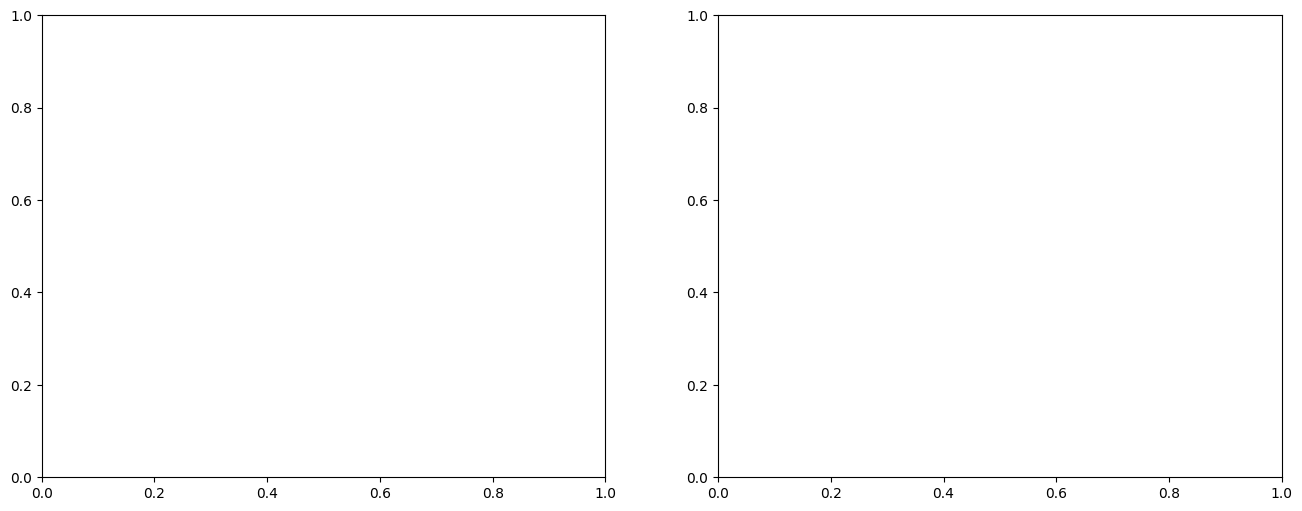

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

def visualize_distributions():
    """
    Visualizes and contrasts Discrete (Binomial) and Continuous (Gaussian) distributions.
    """
    # Create a figure with two subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # --- 1. DISCRETE CASE: Binomial Distribution ---
    # Scenario: Flipping a coin 10 times. X = Number of Heads.
    n, p = 10, 0.5
    x_discrete = np.arange(0, n+1) # Possible outcomes: 0, 1,..., 10

    # PMF: The exact probability of getting exactly k heads
    pmf_values = binom.pmf(x_discrete, n, p)

    # Visualization: Bar Chart
    axes.bar(x_discrete, pmf_values, color='skyblue', edgecolor='black', alpha=0.7)
    axes.set_title(f'Discrete PMF: Binomial(n={n}, p={p})')
    axes.set_xlabel('Number of Successes (k)')
    axes.set_ylabel('Probability Mass P(X=k)')
    axes.set_xticks(x_discrete)
    axes.grid(axis='y', alpha=0.3)

    # Annotation
    axes.text(7, 0.2, "Height = Probability\nSum of heights = 1.0",
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # --- 2. CONTINUOUS CASE: Gaussian Distribution ---
    # Scenario: Measuring heights of students. X = Height (normalized).
    mu, sigma = 0, 1
    x_continuous = np.linspace(-4, 4, 1000)

    # PDF: The density of probability at point x
    pdf_values = norm.pdf(x_continuous, mu, sigma)

    # Visualization: Line Plot
    axes.plot(x_continuous, pdf_values, color='darkorange', linewidth=3)
    axes.set_title(f'Continuous PDF: Normal($\mu$={mu}, $\sigma$={sigma})')
    axes.set_xlabel('Value (x)')
    axes.set_ylabel('Probability Density p(x)')

    # Highlight an Interval (Area under curve)
    # Probability that x is between -1 and 1
    mask = (x_continuous > -1) & (x_continuous < 1)
    axes.fill_between(x_continuous[mask], pdf_values[mask], color='orange', alpha=0.3, label='Area = P(-1 < X < 1)')
    axes.legend()

    # Annotation
    axes.text(1.5, 0.3, "Height!= Probability\nArea = Probability",
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Demonstration of the "Zero Probability" Paradox
    print("--- Continuous Probability Demonstration ---")
    prob_exact_0 = 0.0 # Theoretical
    # Approximating 'exact' 0 by taking a tiny slice
    epsilon = 1e-5
    prob_near_0 = norm.cdf(0 + epsilon, mu, sigma) - norm.cdf(0 - epsilon, mu, sigma)

    print(f"P(X = 0) (Theoretical): {prob_exact_0}")
    print(f"P({-epsilon} < X < {epsilon}) (Calculated Area): {prob_near_0:.8f}")
    print("As the interval shrinks, probability vanishes to 0.")

visualize_distributions()

## Task 2.1 : The Iris DatasetTask

Real-world data is often treated as continuous. You will use the famous Iris dataset to model feature distributions using PDFs.

Steps:
1. Data Loading: Use sklearn.datasets.load_iris to load the data. Convert it to a Pandas DataFrame.
2. Visualization: Select the "Petal Length" column. Plot a histogram. Use density=True in the histogram function so the area sums to 1.
3. Parametric Fitting: Assume Petal Length follows a Normal distribution. Use scipy.stats.norm.fit(data) to calculate the best-fitting mean and standard deviation.
4. Overlay: Plot the PDF of your fitted Normal distribution on top of the histogram.
5. Comparison:
  - Calculate the probability that Petal Length is $< 2.0$ using the fitted Gaussian (CDF).
  - Calculate the actual fraction of flowers with Petal Length $< 2.0$ from the data.
  - Insight Question: Are they close? If not, does the data look Gaussian?
  
*(Hint: Iris Petal Length is bimodal; the Gaussian fit will likely be poor. This illustrates the danger of assuming distributions).*

In [ ]:
# WRITE CODE HERE

SyntaxError: invalid syntax (ipython-input-3945218465.py, line 41)

## **3. Sum Rule, Product Rule, and Bayes' Theorem**

**1. The Sum Rule (Marginalization):**

If we have a joint distribution $P(X, Y)$, we can find the distribution of just $X$ by summing out $Y$.
- Discrete: $P(X) = \sum_{y} P(X, y)$
- Continuous: $p(x) = \int p(x, y) dy$
- Intuition: To get the total probability of $X$, add up all the scenarios where $X$ happens, regardless of what $Y$ is doing.


**2. The Product Rule (Chain Rule):**

The probability of two things happening together ($X$ and $Y$) is the probability of $X$ happening, times the probability of $Y$ happening given that we know X happened.$
- P(X, Y) = P(Y|X)P(X)$
- Symmetry: $P(X, Y) = P(X|Y)P(Y)$.


**3. Bayes' Theorem**

By equating the two forms of the Product Rule, we derive Bayes' Theorem:$$P(X|Y)P(Y) = P(Y|X)P(X) \implies P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}$$This formula is the engine of learning. It tells us how to update our beliefs ($X$) when we see new data ($Y$).
1. Prior $P(X)$: What we thought before seeing data.
2. Likelihood $P(Y|X)$: How well the hypothesis $X$ explains the data $Y$.
3. Posterior $P(X|Y)$: What we think after seeing data.
4. Evidence $P(Y)$: The total probability of the data occurring (normalization constant).

Imagine you lost your keys ($X$). They are either in the Kitchen ($X=K$) or the Bedroom ($X=B$).

- Prior: You spend 80% of your time in the Bedroom. So, Prior belief $P(X=B) = 0.8$, $P(X=K) = 0.2$.
- Likelihood: You look in the Bedroom ($Y=$ Looked in Bedroom) and don't find them. If the keys were there, you would have found them 90% of the time. (Likelihood of "Not Finding" given "Are There" is 0.1).
- Posterior: Your belief changes. Because you looked and failed, the probability they are in the Kitchen skyrockets, even though you haven't looked there yet! The failure to find them in the high-probability zone makes the low-probability zone the new best guess. Bayes theorem quantifies this "shifting of suspicion."

In [5]:
# We will implement a calculator for the classic Medical Diagnostic scenario.
# This highlights the "Base Rate Fallacy."
# Even with a highly accurate test, if the disease is rare, a positive result might still mean you are likely healthy.

def calculate_posterior(prior_disease, sensitivity, specificity):
    """
    Calculates P(Disease | Positive Test) using Bayes' Theorem.

    Parameters:
    prior_disease (float): P(D) - Prevalence of disease in population
    sensitivity (float): P(+ | D) - True Positive Rate (Test accuracy if sick)
    specificity (float): P(- | ~D) - True Negative Rate (Test accuracy if healthy)
    """
    # 1. Derive Complements
    prior_healthy = 1 - prior_disease
    # False Positive Rate: P(+ | ~D)
    false_positive_rate = 1 - specificity

    # 2. Likelihood of Data (+ Test)
    # We need P(+) (The Evidence). We use the Sum Rule.
    # P(+) = P(+|D)P(D) + P(+|~D)P(~D)
    p_positive_given_disease = sensitivity
    p_positive_given_healthy = false_positive_rate

    evidence = (p_positive_given_disease * prior_disease) + \
               (p_positive_given_healthy * prior_healthy)

    # 3. Bayes' Theorem
    # P(D|+) = (P(+|D) * P(D)) / P(+)
    posterior = (sensitivity * prior_disease) / evidence

    return posterior, evidence

# --- Scenario Simulation ---
# Disease is rare (0.1%), Test is accurate (99%)
prior = 0.001
sens = 0.99
spec = 0.99

post_prob, total_pos_rate = calculate_posterior(prior, sens, spec)

print(f"--- Medical Test Analysis ---")
print(f"Prevalence of Disease: {prior*100}%")
print(f"Test Accuracy: {sens*100}%")
print(f"\nResult:")
print(f"Probability of being Sick given Positive Test: {post_prob:.4f} ({post_prob*100:.2f}%)")
print(f"Interpretation: Despite 99% accuracy, a positive test means you only have a ~9% chance of being sick.")
print(f"Reason: The False Positives from the massive healthy population drown out the True Positives.")

--- Medical Test Analysis ---
Prevalence of Disease: 0.1%
Test Accuracy: 99.0%

Result:
Probability of being Sick given Positive Test: 0.0902 (9.02%)
Interpretation: Despite 99% accuracy, a positive test means you only have a ~9% chance of being sick.
Reason: The False Positives from the massive healthy population drown out the True Positives.


## Task 3.1 : The Prosecutor's Fallacy

A DNA match is found between a suspect and a crime scene sample.

The prosecutor says:
- " The chance of this DNA match happening by random luck is 1 in a million ($10^{-6}$).
- Therefore, there is a 99.9999% chance the suspect is guilty."

Coding:
1. Define a population size of 10,000,000 potential suspects.
2. Set the Prior $P(\text{Guilty}) = 1 / 10,000,000$ (assuming the suspect was picked purely based on the database match, not other evidence).
3. Set the Likelihood of Match given Innocent (False Positive) to $10^{-6}$.
4. Set the Likelihood of Match given Guilty to 1.0.
5. Use the calculate_posterior logic to find $P(\text{Guilty} | \text{Match})$.

Visualization: Generate a plot.
1. X-axis: Prior Probability of Guilt (ranging from $10^{-7}$ to $0.5$).
2. Y-axis: Posterior Probability of Guilt.

Show how much other evidence (increasing the prior) is needed before the DNA match actually proves guilt beyond a reasonable doubt.

In [ ]:
#WRITE CODE HERE

Jacobian of Softmax (3 inputs):
⎡ ⎛ z₂    z₃⎞  z₁          z₁ + z₂             z₁ + z₃     ⎤
⎢ ⎝ℯ   + ℯ  ⎠⋅ℯ          -ℯ                  -ℯ            ⎥
⎢──────────────────  ──────────────────  ──────────────────⎥
⎢                 2                   2                   2⎥
⎢⎛ z₁    z₂    z₃⎞   ⎛ z₁    z₂    z₃⎞   ⎛ z₁    z₂    z₃⎞ ⎥
⎢⎝ℯ   + ℯ   + ℯ  ⎠   ⎝ℯ   + ℯ   + ℯ  ⎠   ⎝ℯ   + ℯ   + ℯ  ⎠ ⎥
⎢                                                          ⎥
⎢      z₁ + z₂        ⎛ z₁    z₃⎞  z₂          z₂ + z₃     ⎥
⎢    -ℯ               ⎝ℯ   + ℯ  ⎠⋅ℯ          -ℯ            ⎥
⎢──────────────────  ──────────────────  ──────────────────⎥
⎢                 2                   2                   2⎥
⎢⎛ z₁    z₂    z₃⎞   ⎛ z₁    z₂    z₃⎞   ⎛ z₁    z₂    z₃⎞ ⎥
⎢⎝ℯ   + ℯ   + ℯ  ⎠   ⎝ℯ   + ℯ   + ℯ  ⎠   ⎝ℯ   + ℯ   + ℯ  ⎠ ⎥
⎢                                                          ⎥
⎢      z₁ + z₃             z₂ + z₃        ⎛ z₁    z₂⎞  z₃  ⎥
⎢    -ℯ                  -ℯ               ⎝ℯ   + ℯ  ⎠

## **4. Summary Statistics and Independence**

In the previous module, we looked at vectors. But in deep learning, our parameters are often stored in matrices. A weight matrix $W$ connects two layers. When we train the network, we need the gradient of the loss $L$ with respect to the matrix $W$. This gives us $\frac{\partial L}{\partial W}$.

**4.1 Expectation and Variance**

- Expectation (Mean): The center of mass of the distribution. $\mathbb{E}[x] = \int x p(x) dx$. It is a linear operator: $\mathbb{E}[ax] = a\mathbb{E}[x]$.
- Variance: The spread of the distribution. $Var[x] = \mathbb{E}[(x - \mu)^2]$. It measures how much the data deviates from the mean on average.

**4.2 Independence**

- Two random variables $X$ and $Y$ are Independent if knowing $X$ tells you nothing about $Y$.
- Mathematically: $p(x, y) = p(x)p(y)$. The joint distribution factorizes.
- Conditional: $p(y|x) = p(y)$.

**4.3 Covariance vs. Independence**

- Covariance: Measures linear relationship. $Cov[x, y] = \mathbb{E}[(x-\mu_x)(y-\mu_y)]$.
- Correlation: Normalized covariance (between -1 and 1).
- The Trap: If $X$ and $Y$ are independent, Covariance is 0. BUT, if Covariance is 0, they are not necessarily independent. They could have a strong non-linear relationship (e.g., a circle or a parabola) that linear statistics cannot see.



**Helicopter example**
1. Independent: Imagine a pilot and a passenger. The passenger is reading a book ($X$) and the pilot is moving the stick ($Y$). The passenger's page number has no effect on the stick position. They are independent.
2. Dependent but Zero Covariance: Imagine the pilot moving the joystick ($X$) to control rotor speed ($Y$).
- If she pushes the stick Forward ($X=+1$), speed goes Up ($Y=High$).
- If she pulls the stick Backward ($X=-1$), speed goes Up ($Y=High$).
- If she leaves it Neutral ($X=0$), speed goes Down ($Y=Low$).
- This is a relationship ($Y = X^2$). $Y$ depends entirely on $X$.

3. However, if you calculate Correlation, the "Up" from positive $X$ cancels out the "Up" from negative $X$. The correlation is Zero. A linear algorithm would think the stick and speed are unrelated, leading to a crash.

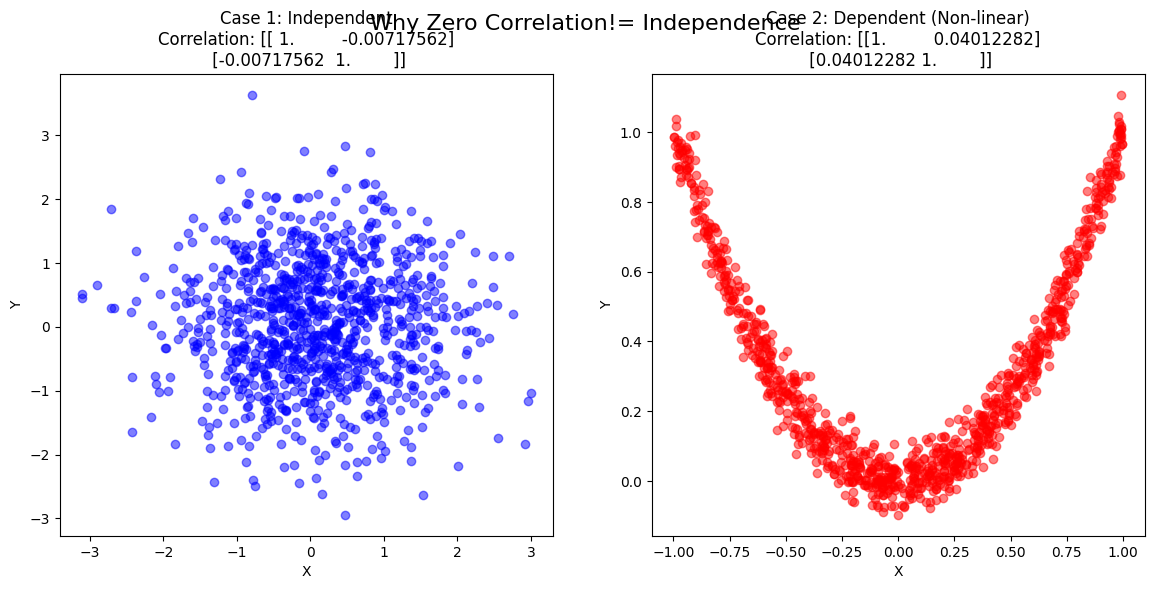

In Case 2, knowing X tells you exactly what Y is.
Yet, the correlation is almost zero.


In [13]:
#We will generate synthetic data to prove that summary statistics can lie.
#You will create datasets that have identical means and variances but vastly different relationships.

import numpy as np
import matplotlib.pyplot as plt

def correlation_trap():
    """
    Demonstrates zero correlation despite perfect dependence.
    """
    n_samples = 1000

    # Case 1: True Independence
    x1 = np.random.normal(0, 1, n_samples)
    y1 = np.random.normal(0, 1, n_samples)

    # Case 2: Quadratic Dependence (Y = X^2)
    x2 = np.random.uniform(-1, 1, n_samples)
    # Y is determined by X, plus tiny noise
    y2 = x2**2 + np.random.normal(0, 0.05, n_samples)

    # Calculate Correlation
    corr1 = np.corrcoef(x1, y1)
    corr2 = np.corrcoef(x2, y2)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].scatter(x1, y1, alpha=0.5, color='blue')
    axes[0].set_title(f"Case 1: Independent\nCorrelation: {corr1}")
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')

    axes[1].scatter(x2, y2, alpha=0.5, color='red')
    axes[1].set_title(f"Case 2: Dependent (Non-linear)\nCorrelation: {corr2}")
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y')

    plt.suptitle("Why Zero Correlation!= Independence", fontsize=16)
    plt.show()

    print("In Case 2, knowing X tells you exactly what Y is.")
    print("Yet, the correlation is almost zero.")

correlation_trap()

## Task 4.1 : Auto-Correlation in Time Series

1. Generate Data: Create a time series signal x of 1000 points using a sine wave: x = np.sin(np.linspace(0, 20, 1000)).

2. Lagged Features: Create a new variable y which is just x shifted by some steps.

- y_small_lag: Shift x by 10 indices.

- y_half_period: Shift x by roughly half the wavelength of the sine wave.

3. Correlation Analysis: Calculate the correlation coefficient between x and y for different shift amounts.

4. Plot: Plot Correlation vs Lag Amount.

Question: At what lag does the correlation hit -1? What does this mean physically about the wave?

In [ ]:
#WRITE CODE HERE

## **5. Gaussian Distribution**

1. Univariate: A novice shooter aims at a vertical line on a wall. Most shots hit the line ($\mu$). Some go left/right due to jitter ($\sigma$). The pattern of paint density is the Bell Curve.
2. Multivariate (2D): The shooter aims at a bullseye on the wall.
  - Steady Hand ($\Sigma = I$): The splatter is a perfect circle.
  - Shaky Hand ($\Sigma$ Diagonal): The shooter's hand shakes side-to-side, but not up-and-down. The splatter becomes a wide, flat oval.
  - Diagonal Motion ($\Sigma$ Full): The shooter flinches diagonally when pulling the trigger. The splatter becomes a tilted oval. If $x$ is high (right), $y$ is also likely high (up). This is correlation.

We will use scipy.stats.multivariate_normal to visualize how the Covariance Matrix controls the geometry of the distribution. We will generate 3D surface plots of probability density.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_multivariate_shapes():
    """
    Plots contour maps of Bivariate Gaussians with different Covariance geometries.
    """
    # Grid for plotting
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.dstack((x, y))

    # 1. Standard (Independent)
    mu_1 =
    cov_1 = [, ] # Identity matrix

    # 2. Correlated (Positive Correlation)
    mu_2 =
    cov_2 = [[1, 0.8], [0.8, 1]] # High correlation (0.8)

    # 3. Anti-Correlated (Negative Correlation)
    mu_3 =
    cov_3 = [[1, -0.8], [-0.8, 1]]

    configs =

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for i, (mu, cov, title) in enumerate(configs):
        rv = multivariate_normal(mu, cov)
        z = rv.pdf(pos)

        axes[i].contourf(x, y, z, levels=15, cmap='viridis')
        axes[i].set_title(title)
        axes[i].set_xlabel('X1')
        axes[i].set_ylabel('X2')
        axes[i].grid(True)

    plt.suptitle("Geometry of the Multivariate Gaussian", fontsize=16)
    plt.show()

plot_multivariate_shapes()

SyntaxError: invalid syntax (ipython-input-577216869.py, line 14)

## Task 5.1: The Central Limit Theorem

Create a "weird" non-Gaussian distribution. For example, a uniform distribution from 0 to 1, or an exponential distribution.

Simulation:
- Draw sample size $N=2$. Sum them. Repeat 1000 times. Plot histogram.
- Draw sample size $N=5$. Sum them. Repeat 1000 times. Plot histogram.
- Draw sample size $N=30$. Sum them. Repeat 1000 times. Plot histogram.

Watch as the messy, blocky, or skewed source distribution magically transforms into the smooth Gaussian Bell Curve as $N$ increases. This proves why Gaussians are everywhere in nature.

In [ ]:
#WRITE CODE HERE

## **6. Conjugacy and the Exponential Family**

Imagine a robot librarian tracking how popular a book is.

1. Prior: The robot assumes the book is "average." It writes on a card: Likes: 1, Dislikes: 1. (This is a Beta(1,1) Prior).

2. Data: A student reads the book and says "I liked it."

3. Update: The robot doesn't need calculus. It just updates the card: Likes: 1 + 1 = 2, Dislikes: 1.

4. Data: 10 people read it. 8 like it, 2 dislike it.

5. Update: Likes: 2 + 8 = 10, Dislikes: 1 + 2 = 3.

6. Conjugacy: The "card system" (Prior) was designed perfectly to match the "user feedback" (Data) so that updating belief is just simple arithmetic.

We will simulate a real-time learning system. We will generate a stream of coin flip data and watch how the Beta distribution evolves from a flat line (total ignorance) to a sharp peak (certainty) around the true probability.

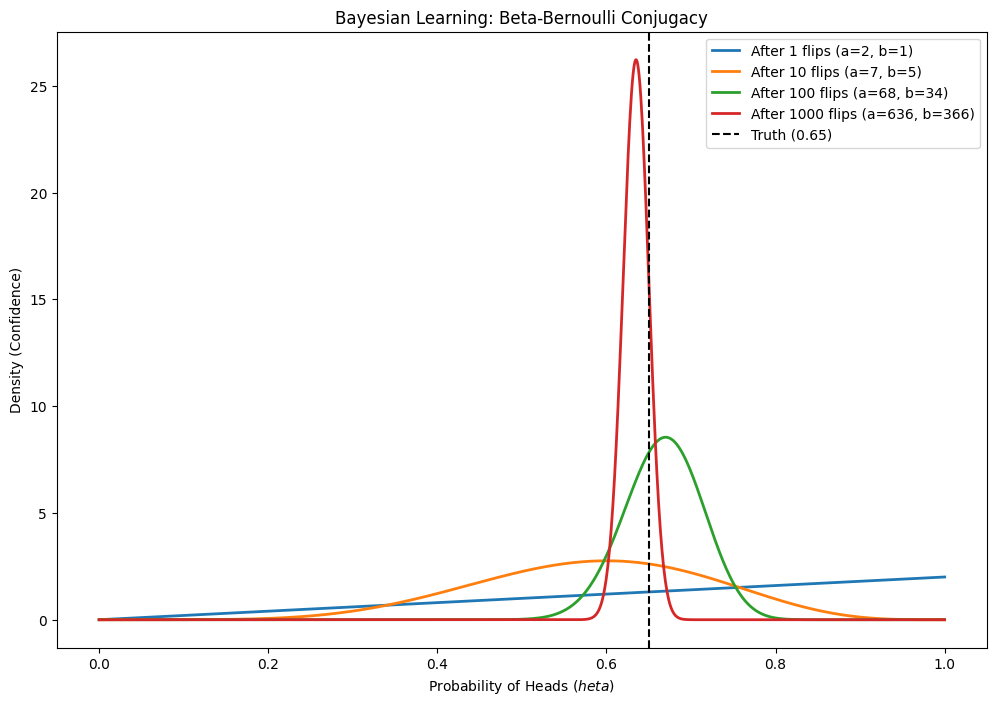

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def simulate_learning():
    """
    Simulates Bayesian updating of a Beta posterior.
    """
    # 1. The Hidden Truth (We want the model to learn this)
    true_prob = 0.65

    # 2. Prior Beliefs (Alpha=1, Beta=1 is Uniform/Flat)
    # This represents "I have no idea"
    a, b = 1, 1

    # 3. Experiment Data (Batches of coin flips)
    batches = [1,10,100,1000]

    x = np.linspace(0, 1, 1000)
    plt.figure(figsize=(12, 8))

    for n_flips in batches:
        # Simulate Data based on Hidden Truth
        if n_flips > 0:
            flips = np.random.binomial(n=1, p=true_prob, size=n_flips)
            heads = flips.sum()
            tails = n_flips - heads

            # THE LEARNING STEP (Conjugate Update)
            # Posterior Parameters = Prior Parameters + Data Counts
            curr_a = a + heads
            curr_b = b + tails
        else:
            curr_a, curr_b = a, b

        # Calculate PDF
        y = beta.pdf(x, curr_a, curr_b)

        # Plot
        label = f'After {n_flips} flips (a={curr_a}, b={curr_b})'
        plt.plot(x, y, linewidth=2, label=label)

    plt.axvline(true_prob, color='black', linestyle='--', label='Truth (0.65)')
    plt.title('Bayesian Learning: Beta-Bernoulli Conjugacy')
    plt.xlabel('Probability of Heads ($\theta$)')
    plt.ylabel('Density (Confidence)')
    plt.legend()
    plt.show()

simulate_learning()

## Task 6.1: The Search and Rescue Drone
- Scenario: A drone is searching for a lost hiker in a grid sector. The probability of finding the hiker is modeled as a Bernoulli trial (Found/Not Found).
- Priors: The terrain is difficult. Initialize a Beta prior that is skewed towards low probability of success (e.g., $\alpha=1, \beta=5$).
- Simulation: Run a loop where the drone attempts 10 searches.
  - Assume the "True" probability of finding is 0.2.
  - Update the Beta distribution after every search.
- Decision Making:
  - Calculate the Expected Value (Mean) of the posterior after each step.
  - If the Expected Value drops below 0.1, the drone should "Abort" the sector.- Does the drone abort? At what step?

In [ ]:
#WRITE CODE HERE

Point (-1, 0): Eigenvals [-6, 2]
Point (1, 0): Eigenvals [6, 2]


## **7. Change of Variables and Inverse Transform**

1. Change of Variables (The Dough):

Imagine probability is a 1kg lump of dough spread on a table (x-axis).
- If you stretch the dough to be twice as long ($y = 2x$), the dough must get half as thin to keep the same mass.
- The function $y=2x$ changes the coordinate, but the Jacobian ($1/2$) accounts for the dough getting thinner. Without it, you would magically create more dough (probability > 1).

2. Inverse Transform (The Prism):

Think of the Uniform distribution as white light (equal intensity everywhere). The Inverse CDF is like a prism or a shaped lens. It takes this uniform stream of light and bends it, concentrating it into bright spots (high probability peaks) and spreading it out in dark spots (tails), perfectly recreating the desired pattern.

You will "hack" the random number generator. Using only the ability to generate a number between 0 and 1, you will write code to generate samples from an Exponential distribution.

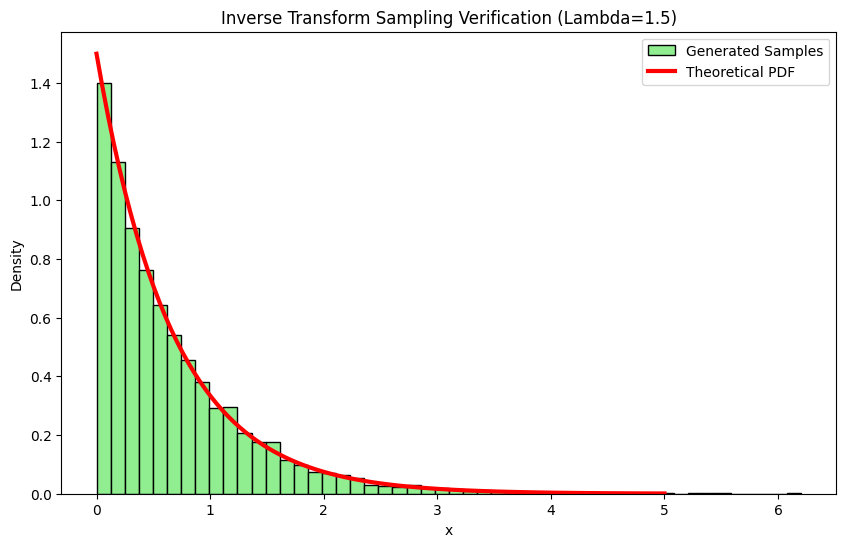

In [22]:
#refer THIS
import numpy as np
import matplotlib.pyplot as plt

def custom_exponential_sampler(lambda_param, n_samples=10000):
    """
    Generates Exponential samples using Inverse Transform Sampling.
    Math:
    PDF: p(x) = lambda * exp(-lambda * x)
    CDF: F(x) = 1 - exp(-lambda * x)
    Inverse CDF: F^-1(u) = -ln(1 - u) / lambda
    """
    # 1. Source of Randomness: Uniform
    u = np.random.uniform(0, 1, n_samples)

    # 2. Transformation (The Prism)
    # Note: Since (1-u) is also Uniform, we can simplify to -ln(u)/lambda
    # But we stick to the math definition for clarity.
    x_generated = -np.log(1 - u) / lambda_param

    return x_generated

# --- Verification ---
lambda_val = 1.5
samples = custom_exponential_sampler(lambda_val)

# Visualization
plt.figure(figsize=(10, 6))

# Histogram of our "Hacked" samples
plt.hist(samples, bins=50, density=True, color='lightgreen', edgecolor='black', label='Generated Samples')

# Overlay the Analytical PDF (The Truth)
x_axis = np.linspace(0, 5, 100)
pdf_theoretical = lambda_val * np.exp(-lambda_val * x_axis)
plt.plot(x_axis, pdf_theoretical, 'r-', linewidth=3, label='Theoretical PDF')

plt.title(f'Inverse Transform Sampling Verification (Lambda={lambda_val})')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

## Task 7.1 : The Triangle Distribution

You need to generate random numbers that follow a "Triangle" distribution: $p(x) = 2x$ for $0 \le x \le 1$, and 0 otherwise.

- Math: Calculate the CDF $F(x) = \int_0^x 2t dt$. (Result: $x^2$).

- Inverse: Find the inverse function $x = F^{-1}(u)$. (Result: $x = \sqrt{u}$).

Code:

- Generate 10,000 uniform random numbers.
- Apply the square root transformation.
- Plot the histogram.
- Does it look like a triangle (linear ramp up)? compare it to the line $y=2x$.